In [19]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

from cleverhans.attacks import FastGradientMethod, LBFGS, DeepFool
from cleverhans.utils_keras import KerasModelWrapper

from foolbox.attacks import BoundaryAttack

from keras.datasets import cifar10
from keras.models import load_model
from keras.utils import to_categorical
from keras import backend as K

import sys
sys.path.append('../Final_notebook/')
import proj_utils as utils

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# y_test_tmp = np.squeeze(y_test)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [3]:
model1 = load_model('../Saved_models/good_models/cifar10/cifar10_vgg_like_175.h5')
model2 = load_model('../Saved_models/good_models/cifar10/cifar10_ResNet56v2_model.136.h5')
model3 = load_model('../Saved_models/good_models/cifar10/cifar10_densenet121_083.h5')

In [4]:
print(model1.evaluate(x_test, y_test))
print(model2.evaluate(x_test, y_test))
print(model3.evaluate(x_test, y_test))

10000/10000 [==============================] - 4s 420us/step
[0.4428189704418182, 0.8906]
10000/10000 [==============================] - 11s 1ms/step
[0.39918358292579653, 0.925]
10000/10000 [==============================] - 11s 1ms/step
[0.540665489012003, 0.8807]


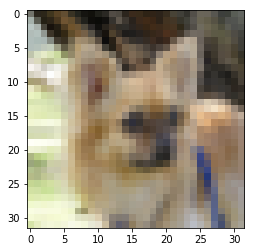

In [5]:
i = 421
img = x_test[[i]]
img_label = y_test[[i]]
plt.imshow(img[0])

In [21]:
print(utils.decode_cifar10_preds(model1.predict(img)))
print(utils.decode_cifar10_preds(model2.predict(img)))
print(utils.decode_cifar10_preds(model3.predict(img)))

[[('dog', 0.99855655), ('cat', 0.0011238615), ('horse', 0.00014931468)]]
[[('dog', 0.99980766), ('deer', 0.00017862326), ('horse', 1.1230042e-05)]]
[[('dog', 0.9992778), ('deer', 0.00066359545), ('cat', 5.843094e-05)]]


In [7]:
K.set_learning_phase(0)
ch_model = KerasModelWrapper(model1)
lbfgs = LBFGS(ch_model, sess=K.get_session())

In [8]:
def batches(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]

In [9]:
target = np.zeros((1, 10), dtype=int)
target[0, 0] = 1
adv = lbfgs.generate_np(img, y_target=target)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



/home/calvin/python3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning:

Mean of empty slice.

/home/calvin/python3/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning:

invalid value encountered in double_scalars



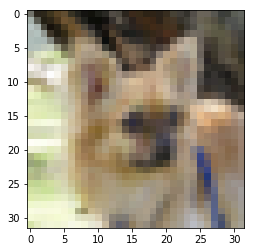

In [10]:
utils.plot_pair(img[0], adv[0], model1)

In [22]:
print(utils.decode_cifar10_preds(model1.predict(adv)))
print(utils.decode_cifar10_preds(model2.predict(adv)))
print(utils.decode_cifar10_preds(model3.predict(adv)))

[[('airplane', 0.49497712), ('dog', 0.18602064), ('horse', 0.088616714)]]
[[('dog', 0.9576676), ('deer', 0.04203258), ('horse', 0.00027639134)]]
[[('dog', 0.9983039), ('deer', 0.0015837076), ('cat', 0.000112075235)]]


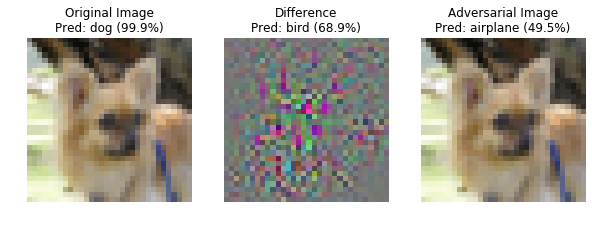

In [12]:
utils.plot_pair(img[0], adv[0], model1)

In [ ]:
deepfool = DeepFool()